In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class Maze:
    def __init__(self, width=10, height=10, seed=None):
        self.width = width if width % 2 == 1 else width - 1
        self.height = height if height % 2 == 1 else height - 1
        self.seed = seed
        if seed is not None:
            random.seed(seed)
            np.random.seed(seed)

        self.maze = np.ones((height, width), dtype=int)  # 1 = wall, 0 = path
        self.start = (0, 0)
        self.goal = (height - 1, width - 1)
        self._generate_maze()
        self.maze[self.start] = 0
        self.maze[self.goal] = 0

    def _generate_maze(self):
        """Recursive backtracking maze generator."""
        visited = np.zeros_like(self.maze)
        stack = []

        def neighbors(y, x):
            directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]
            random.shuffle(directions)
            for dy, dx in directions:
                ny, nx = y + dy, x + dx
                if 0 <= ny < self.height and 0 <= nx < self.width and visited[ny, nx] == 0:
                    yield (ny, nx, dy // 2, dx // 2)

        # Start from top-left corner
        y, x = 0, 0
        visited[y, x] = 1
        self.maze[y, x] = 0
        stack.append((y, x))

        while stack:
            y, x = stack[-1]
            found = False
            for ny, nx, wy, wx in neighbors(y, x):
                if visited[ny, nx] == 0:
                    visited[ny, nx] = 1
                    self.maze[y + wy, x + wx] = 0  # Remove wall
                    self.maze[ny, nx] = 0
                    stack.append((ny, nx))
                    found = True
                    break
            if not found:
                stack.pop()

    def display(self):
        """Prints the maze to the console."""
        display_map = {0: "  ", 1: "██"}
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (y, x) == self.start:
                    row += " S"
                elif (y, x) == self.goal:
                    row += " G"
                else:
                    row += display_map[self.maze[y, x]]
            print(row)

    def get_grid(self):
        """Returns the maze as a NumPy array (0 = free, 1 = wall)."""
        return self.maze.copy()

    def get_start(self):
        return self.start

    def get_goal(self):
        return self.goal


In [ ]:
def plot_maze(maze):
    grid = maze.get_grid()
    fig, ax = plt.subplots()
    ax.imshow(grid, cmap='gray_r')
    ax.scatter(*maze.get_start()[::-1], c='green', s=100, label='Start')
    ax.scatter(*maze.get_goal()[::-1], c='red', s=100, label='Goal')
    ax.legend()
    plt.show()


 S██      ██      
  ██  ██  ██  ██  
      ██  ██  ██  
████████  ██████  
      ██      ██  
████  ██████  ██  
      ██      ██  
  ██████  ██████  
                 G


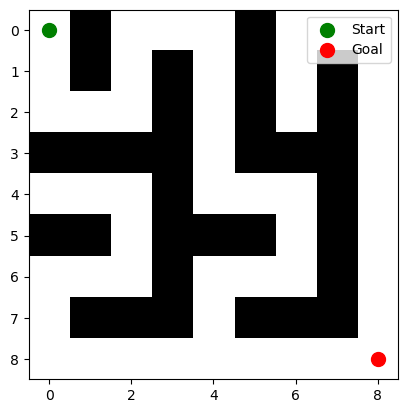

In [25]:
maze = Maze(width=9, height=9, seed=40)
maze.display()
plot_maze(maze)
# Use in RL environment
grid = maze.get_grid()
start = maze.get_start()
goal = maze.get_goal()


In [ ]:
maze = Maze(width=9, height=9)  # Or use MazeManager
env = MazeEnv(maze)
agent = QLearningAgent(env.maze.shape)

train_agent(env, agent, episodes=2000)

# Visualize final policy
state = env.reset()
env.render()
for _ in range(50):
    action = agent.choose_action(state)
    state, reward, done, _ = env.step(action)
    env.render()
    if done:
        print("Goal reached!")
        break
